# Regelmäßige Polytope

In [1]:
%pylab inline

from polytopes import Hypercube
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


# Dimension festlegen

In [2]:
N = 5

# Polytop generieren / importieren
Wir basteln uns einen Hyperwürfel in $N$ Dimensionen.

In [3]:
hc = Hypercube(N)

## Projektionsmatrix bauen
Jetzt brauchen wir eine Orhtonormalbasis $B$, die die beiden Basisvektoren enthält, welche die Ebene aufspannen, auf die wir projizieren wollen. Wir bauen uns diese Matrix sukzessive und gehen von der Identitätsmatrix aus.

In [4]:
B = np.identity(N)
B

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Jetzt wir als einen Basisvektor die Diagonale $e_1 = (1, 1, ..., 1) $ durch den Würfel und normieren.

In [5]:
B[:, 0] = 1 / sqrt(N)
B

array([[0.4472136, 0.       , 0.       , 0.       , 0.       ],
       [0.4472136, 1.       , 0.       , 0.       , 0.       ],
       [0.4472136, 0.       , 1.       , 0.       , 0.       ],
       [0.4472136, 0.       , 0.       , 1.       , 0.       ],
       [0.4472136, 0.       , 0.       , 0.       , 1.       ]])

Mit dem [Gram-Schmidt-Verfahren](https://de.wikipedia.org/wiki/Gram-Schmidtsches_Orthogonalisierungsverfahren) finden wir die übrigen Vektoren unserer Orthonormalbasis.

In [6]:
# Gram-Schmidt-Verfahren
i = 1
while i < N:
    j = 0
    while j < i:
        B[:, i] -= np.dot(B[:, i], B[:, j]) / np.dot(B[:,j], B[:,j]) * B[:, j]
        j += 1
    i += 1
    
B = np.matrix(B)
print("Orthogonalisierte Matrix")
print(B)

Orthogonalisierte Matrix
[[ 4.47213595e-01 -2.00000000e-01 -2.50000000e-01 -3.33333333e-01
  -5.00000000e-01]
 [ 4.47213595e-01  8.00000000e-01 -5.55111512e-17 -4.62592927e-17
  -6.93889390e-17]
 [ 4.47213595e-01 -2.00000000e-01  7.50000000e-01  0.00000000e+00
   0.00000000e+00]
 [ 4.47213595e-01 -2.00000000e-01 -2.50000000e-01  6.66666667e-01
  -5.55111512e-17]
 [ 4.47213595e-01 -2.00000000e-01 -2.50000000e-01 -3.33333333e-01
   5.00000000e-01]]


Bezüglich unserer neuen Basis $B$ sieht die Abbildungsmatrix $P$ der Projektion sehr einfach aus. Wir _schneiden_ einfach die entsprechenden Basisvektoren weg. 

In [7]:
A = np.identity(N)
A[:,0] = 0
A = np.matrix(A)
A

matrix([[0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

Die gesamte Projektionsabbildung $P$ ergibt sich dann aus dem Matrixprodukt $A \cdot B^{-1}$.

In [8]:
P = A * B.I
P

matrix([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [-0.25      ,  1.        , -0.25      , -0.25      , -0.25      ],
        [-0.33333333,  0.        ,  1.        , -0.33333333, -0.33333333],
        [-0.5       ,  0.        ,  0.        ,  1.        , -0.5       ],
        [-1.        ,  0.        ,  0.        ,  0.        ,  1.        ]])

Nach der Projektion müssen wir die unnötigen Basisvektoren mit der Matrix $C$ abschneiden. Wir behalten einfach die letzten zwei Vektoren der Basis $B$

In [9]:
C = np.identity(N)
C = C[:,-2:]
C[:,:-2] = 0
C

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.]])

In [10]:
def proj(pts, P, C):
    return np.array([np.array(P.dot(pt) * C).flatten() for pt in pts])

# Koordinaten projizieren

Wir zentrieren den Würfel um den Punkt $(0,0, ..., 0)$ und speichern die Koordinaten.

In [11]:
# project coordinates
PTS = hc.coordinates - np.ones(N) * 0.5
pts = proj(PTS, P, C)
pts

array([[ 0. ,  0. ],
       [-0.5, -1. ],
       [ 0. ,  0. ],
       [-0.5, -1. ],
       [ 0. ,  0. ],
       [-0.5, -1. ],
       [ 0. ,  0. ],
       [-0.5, -1. ],
       [ 1. ,  0. ],
       [ 0.5, -1. ],
       [ 1. ,  0. ],
       [ 0.5, -1. ],
       [ 1. ,  0. ],
       [ 0.5, -1. ],
       [ 1. ,  0. ],
       [ 0.5, -1. ],
       [-0.5,  1. ],
       [-1. ,  0. ],
       [-0.5,  1. ],
       [-1. ,  0. ],
       [-0.5,  1. ],
       [-1. ,  0. ],
       [-0.5,  1. ],
       [-1. ,  0. ],
       [ 0.5,  1. ],
       [ 0. ,  0. ],
       [ 0.5,  1. ],
       [ 0. ,  0. ],
       [ 0.5,  1. ],
       [ 0. ,  0. ],
       [ 0.5,  1. ],
       [ 0. ,  0. ]])

In [12]:
EDGES = hc.edges - np.ones(N) * 0.5
edges = zeros((N * 2**(N-1), 2, 2))
for i in [0, 1]:
    edges[:,i] = proj(EDGES[:,i], P, C)

# Plotten

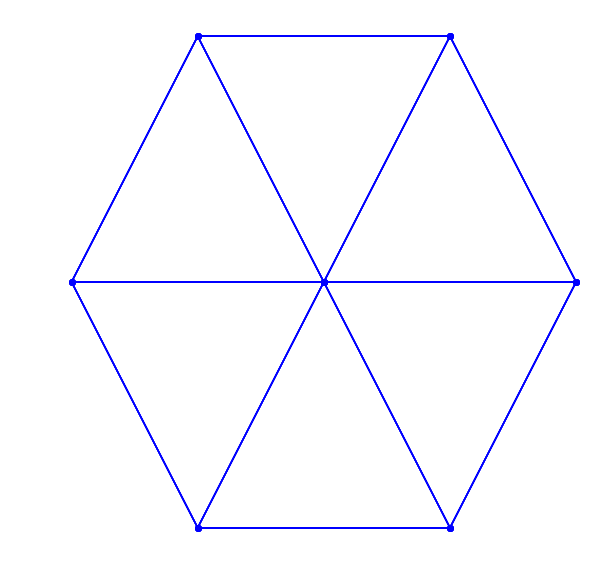

In [13]:
# get coordinates in readable form

# initialize plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.axis("off")

# plot vertices
x, y = pts[:, 0], pts[:, 1]
ax.scatter(x, y, c="b")

# plot edges
for edge in edges:
    x = edge[:, 0]
    y = edge[:, 1]
    ax.plot(x, y, c="b")

# save and show plots
plt.savefig("first-projection.png")
plt.show()